# Introduction

In the contemporary analysis of media content, the quantification of political bias stands as a central challenge. Therefore, there are many studies that utilize contemporary tools like algorithm, machine learning, and NLP techniques to understand the complex dynamics of news framing. Diakopoulos’ pivotal review, "Algorithmic Accountability: Journalistic Investigation of Computational Power Struc-tures," critically examines the interplay between media narra-tives and political biases through the lens of computational technology. Diakopoulos’'s research highlights the need to use computer algorithms to examine and understand the underlying influences within digital systems. This approach is especially relevant today, as we live in a time where news and information are often selected and presented by computer algorithms, which could impact viewers political stance and opinion.

Term Frequency-Inverse Document Frequency (TFIDF) is a powerful method used to explore the specific words that might show political bias in news sources. It's a popular technique in text analysis that measures how important a word is within a group of texts, considering both how often it appears and how unique it is to certain documents. With this ability, TFIDF helps highlight words that are particularly common in some texts but not others, allowing us to closely study differences in word choice across various political views.


Choosing TFIDF as the main tool for this study is based on its ability to reveal the small but significant patterns in language that can help us tell conservative and liberal news sources apart. This choice is not only solid from a technical standpoint but also fits well with the idea of algorithmic accountability that Stray talks about. By using TFIDF to measure and compare how language is used differently by news sources with different political views, this research aims to add to the ongoing conversation about media bias, and provide a deeper understanding of how news content is shaped by underlying algorithms.

# Research Question & Hypothesis

In the landscape of United States media, the political orientation of news outlets is a subject of considerable discussion and analysis. These orientations, ranging from liberal to conservative, significantly influence the framing of narratives, selection of topics, and overall portrayal of news stories. This difference in viewpoints leads to varied news coverage, which can affect what people think, government policies, and how democracy works.  Given the crucial role of media in shaping societal perceptions, there is a growing interest in quantitatively understanding and classifying the political bias inherent in news coverage. With advancements in natural language processing (NLP) and text analysis techniques, such as Term Frequency-Inverse Document Frequency (TFIDF), it is now feasible to systematically examine the content produced by various news organizations to identify patterns indicative of political bias.

### <ins>Research Question:</ins>
Can Term Frequency-Inverse Document Frequency (TFIDF) analysis distinguish between liberal and conservative news companies in the United States based on the content of their articles?

### <ins>Hypothesis:</ins>
TFIDF analysis of news articles will reveal distinct lexical patterns that correlate with the political bias of the news source. Specifically, conservative news outlets are expected to exhibit a unique set of frequently used terms and narratives that differ significantly from those employed by liberal news organizations.

# Data

The data was originally obtained from Kaggle.com, "All the news" dataset from Andrew Thompson. "All the News" dataset contains 142,570 articles from various news source in the United States from the year 2000 to 2016.

The data were collected using a webscrapping tool called BeautifulSoup and stored in Sqlite, and is divided into three different set because of the size limit Kaggle has. Therefore, for our research purpose, I loaded all 3 datasets and concatenated all three into one big dataset to for the analysis.

### <ins>1. Data Structure</ins>
The dataset contains 142,570 rows and 10 columns, indicating a substantial volume of data points. Each row encapsulates information related to news articles, including attributes like the article ID, article's title, publication source, author, publication date, URL to the news article, and the content itself.

### <ins>2. Missing Values</ins>
Upon examining missing data, it's evident that most columns are well-populated, with notable exceptions. The title column is nearly complete, missing only two entries. The author column has a significant number of missing values, totaling 15,876. Dates (including year and month) are missing for 2,641 entries. The url column, which provides a direct link to the articles, is missing for 57,011 entries, indicating that for a sizable fraction of the dataset, accessing the original articles would not be possible through these means.

However, for this research purpose, we would only need the publication and content column, which shows the actual content of the article, and its publication source. Data inspection shows that there is no null values for both columns, therefore, there is no need for missing values imputation.

### <ins>3. Date Range</ins>
Statistical summaries of numeric columns indicate a focus on more recent articles, with the year column ranging from 2000 to 2017, centering primarily around 2016 and 2017. This temporal concentration suggests the dataset is particularly relevant for analyzing news trends and media representation in the lead-up to and immediate aftermath of the 2016 United States presidential election.

### <ins>4. Types of Publications</ins>
The dataset contains articles from a diverse array of 15 news outlets, including the New York Times, Breitbart, CNN, Business Insider, the Atlantic, Fox News, Talking Points Memo, Buzzfeed News, National Review, New York Post, the Guardian, NPR, Reuters, Vox, and the Washington Post. These 15 news sources span a broad spectrum of political alignments, ranging from conservative to liberal, with some positioned as neutral.


In [1]:
# Import all necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import string
from spacy.lang.en.stop_words import STOP_WORDS

In [2]:
#read in the .csv file

df1 = pd.read_csv('../data/articles1.csv', encoding = "UTF-8")
df2 = pd.read_csv('../data/articles2.csv', encoding = "UTF-8")
df3 = pd.read_csv('../data/articles3.csv', encoding = "UTF-8")

# concatenate all 3 datasets
df = pd.concat([df1, df2, df3], ignore_index=True)

In [3]:
df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [5]:
# 1. Number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1], "\n")

# 2. Check for missing data in each column
missing_data = df.isnull().sum()
print("Missing data in each column:")
print(missing_data, "\n")

# 3. General overview of columns
print("Data types of each column:")
print(df.dtypes)

print("\nFirst few rows of the dataset for a quick overview:")
print(df.head())

# Optional: Describe numeric columns to get a sense of distributions
print("\nStatistics for numeric columns:")
print(df.describe())

# Optional: Unique values in 'publication' to understand the variety
if 'publication' in df:
    print("\nUnique publications:")
    print(df['publication'].unique())

# Optional: Year range to understand the timeframe of the data
if 'year' in df:
    print("\nData covers years from", df['year'].min(), "to", df['year'].max())


Number of rows: 142570
Number of columns: 10 

Missing data in each column:
Unnamed: 0         0
id                 0
title              2
publication        0
author         15876
date            2641
year            2641
month           2641
url            57011
content            0
dtype: int64 

Data types of each column:
Unnamed: 0       int64
id               int64
title           object
publication     object
author          object
date            object
year           float64
month          float64
url             object
content         object
dtype: object

First few rows of the dataset for a quick overview:
   Unnamed: 0     id                                              title  \
0           0  17283  House Republicans Fret About Winning Their Hea...   
1           1  17284  Rift Between Officers and Residents as Killing...   
2           2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...   
3           3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...   


### <ins>Distribution of News Publication</ins>

The EDA of the datasets shows that Breitbart has the largest count at 23,781 articles. Following closely is the New York Post with 17,493 articles, highlighting a significant presence in the dataset. Other notable publications include NPR and CNN, with 11,992 and 11,488 articles, respectively. The Washington Post and Reuters also feature prominently, each with over 10,000 articles. Mid-range contributors such as the Guardian, New York Times, Atlantic, and Business Insider offer between 6,757 and 8,681 articles. Towards the lower end, National Review, Talking Points Memo, Vox, Buzzfeed News, and Fox News contribute between 4,354 and 6,203 articles each, which is still a good amount of data for analysis.

In [6]:
df['publication'].value_counts()

publication
Breitbart              23781
New York Post          17493
NPR                    11992
CNN                    11488
Washington Post        11114
Reuters                10710
Guardian                8681
New York Times          7803
Atlantic                7179
Business Insider        6757
National Review         6203
Talking Points Memo     5214
Vox                     4947
Buzzfeed News           4854
Fox News                4354
Name: count, dtype: int64

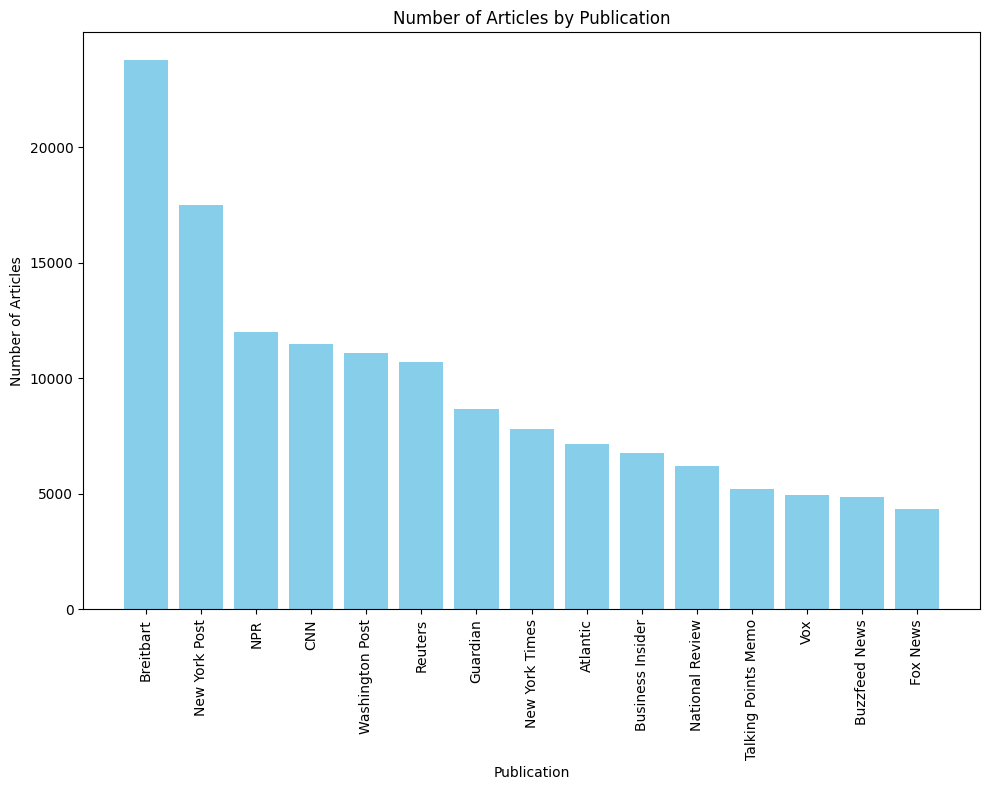

In [7]:
import matplotlib.pyplot as plt

publication_counts = df['publication'].value_counts()

# Creating the histogram plot correctly
plt.figure(figsize=(10, 8))
plt.bar(publication_counts.index, publication_counts, color='skyblue')
plt.xlabel('Publication')
plt.ylabel('Number of Articles')
plt.title('Number of Articles by Publication')
plt.xticks(rotation=90)  # Rotate labels to make them readable
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


## Political Bias of News Coverage

![Example Image](../figures/bias-image.png)


When categorizing media outlets by their political bias, it's essential to consider their editorial stance, the type of stories they prioritize, and the perspectives they frequently present. For this analysis, the division into "Conservative" and "Liberal" groupings is informed by the AllSides Media Bias Chart, (https://www.allsides.com/media-bias/media-bias-chart) a widely recognized resource that evaluates media sources on their political bias.

In the dataset, we have total 15 news companies, including the New York Times, Breitbart, CNN, Business Insider, the Atlantic, Fox News, Talking Points Memo, Buzzfeed News, National Review, New York Post, the Guardian, NPR, Reuters, Vox, and the Washington Post. 

Below, I will divide each news outlet into

**1. Right**

**2. Lean Right**

**3. Left**

**4. Lean Left**

**5. Moderate (Neutral)**

**6. Unknown**

categories based on AllSides Media Bias Chart shown above.

### <ins>Conservative</ins>
- Right: Breitbart, Fox News, 
- Lean Right: New York Post, National Review

According to the AllSides Media Bias Chart, **Breitbart** and **Fox News** were in the *Right* category, known for their conservative editorial stances.  The **New York Post** and **National Review**, were also lean right but are more towards neutral compared to Beritbart and Fox News. These outlets often prioritize stories and perspectives that align with conservative political ideologies, emphasizing themes like limited government, individual liberties, free markets, and traditional social values.

### <ins>Liberal</ins>
- Left: Atlantic, Vox
- Lean Left: CNN, Guardian, NPR, New York Times, Washington Post, Business Insider

On the other hand, the chart shows that "Liberal" category comprises media sources like The **Atlantic** and **Vox**, which are identified as left-lean. Then, **CNN**, **Guardian, NPR, Washington Post, Business Insider** and **The New York Times**, lean towards left, but more towards neutral viewpoints. These publications tend to focus on issues such as social equality, environmental activism, progressive social policies, and critiques of conservative politics.

###  <ins>Moderate and Unknown</ins>
- Moderate: Reuters
- Unknown: Buzzfeed News, Talking Points Memo

**Reuters** are in the central region from the chart, showing that this publication tends to be neutral, and not lean towards either side. On the other hand, **Buzzfeed News** and **Talking Points Memo** were not shown in the chart, therefore we will eliminate those news companies from when dividing dataset.

## Data Division

For the fairness when dividing dataset into two categories; conservative and liberal, I will include 2 from Right, 2 from Lean Right, to make **"Conservative"** set, and 2 from Left and 2 from Lean Left to make **"Liberal"** set to give fairness, but still adds variety to each category.


In [8]:
# Lists of publications by political leaning

# Right: Breitbart, Fox News, 
# Lean Right: New York Post, National Review

# Left: Atlantic, Vox
# Lean Left: CNN, Guardian, NPR, New York Times, Washington Post, Business Insider,

# moderate: Reuters
# unknown: Buzzfeed News, Talking Points Memo

# choose 2 from right, 2 from lean right and 2 from left, 2 from lean left
conservative = ['Breitbart', 'Fox News', 'New York Post', 'National Review']
liberal = ['Atlantic', 'Vox', 'CNN', 'New York Times']

# Create a new column 'political_bias' and initially set all values to None or another placeholder if preferred
df['political_bias'] = None

# Update 'political_bias' based on the publication's political leaning
df.loc[df['publication'].isin(conservative), 'political_bias'] = 'Conservative'
df.loc[df['publication'].isin(liberal), 'political_bias'] = 'Liberal'

df = df.dropna(subset=['political_bias'])


In [9]:
df

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,political_bias
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,Liberal
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",Liberal
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",Liberal
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",Liberal
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",Liberal
...,...,...,...,...,...,...,...,...,...,...,...
131451,134914,203961,Why General Tso’s chicken is so popular in Ame...,Vox,German Lopez,2016/12/28,2016.0,12.0,http://www.vox.com/culture/2016/12/28/14058702...,General Tso’s chicken is freaking delicious. ...,Liberal
131452,134915,203970,"From Game of Thrones to The Witch, 2016 was pa...",Vox,Michelle Delgado,2016/12/29,2016.0,12.0,http://www.vox.com/culture/2016/12/29/13989428...,Game of Thrones’ most recent season found rep...,Liberal
131453,134916,203972,5 words that explain 2016,Vox,Tanya Pai,2016/12/29,2016.0,12.0,http://www.vox.com/culture/2016/12/29/13941758...,We’ve somehow made it to the end of 2016 with...,Liberal
131454,134917,203974,2016 in box office winners (Disney!) and loser...,Vox,Gregory Ellwood,2016/12/29,2016.0,12.0,http://www.vox.com/culture/2016/12/29/14021570...,2016 was a strange year for Hollywood on the ...,Liberal


In [10]:
df['political_bias'].value_counts()

political_bias
Conservative    51831
Liberal         31417
Name: count, dtype: int64

### Sampling

After dividing up the data, we now have 51,831 rows for conservative news publications' articles, and 31,417 rows from liberal news publications' articles.

For the purpose of this research, we will randomly sample 250 news articles from each news outlets (total of 8 news publication.)

In the result, we would have total of 2000 rows of data, 1000 from conservative news companies, and 1000 from liberal news publications to analyze.

In [11]:
# Sample 250 random rows for each publication
# convervative
breitbart = df[(df['political_bias'] == 'Conservative') & (df['publication'] == 'Breitbart')].sample(n=250, replace=True)
fox = df[(df['political_bias'] == 'Conservative') & (df['publication'] == 'Fox News')].sample(n=250, replace=True)
nyp = df[(df['political_bias'] == 'Conservative') & (df['publication'] == 'New York Post')].sample(n=250, replace=True)
national_review = df[(df['political_bias'] == 'Conservative') & (df['publication'] == 'National Review')].sample(n=250, replace=True)

#liberal
atlantic = df[(df['political_bias'] == 'Liberal') & (df['publication'] == 'Atlantic')].sample(n=250, replace=True)
vox = df[(df['political_bias'] == 'Liberal') & (df['publication'] == 'Vox')].sample(n=250, replace=True)
cnn = df[(df['political_bias'] == 'Liberal') & (df['publication'] == 'CNN')].sample(n=250, replace=True)
nyt = df[(df['political_bias'] == 'Liberal') & (df['publication'] == 'New York Times')].sample(n=250, replace=True)

In [46]:
# concatenate conservative and liberal sampled datasets
data = pd.concat([breitbart, fox, nyp, national_review, atlantic,vox, cnn, nyt ], ignore_index=True)

In [13]:
data

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,political_bias
0,13622,32358,Nina Turner: ’No One in Ohio Is Asking About R...,Breitbart,Pam Key,2017-05-28,2017.0,5.0,NaN,"Sunday on CNN’s “State of the Union,” while di...",Conservative
1,19052,37795,The Democrats Are Officially the Anti-Israel P...,Breitbart,Joel B. Pollak,2016-12-23,2016.0,12.0,NaN,With President Barack Obama’s abstention at th...,Conservative
2,30693,49458,Blue State Blues: The Graph That Explains Dona...,Breitbart,Joel B. Pollak,2016-09-01,2016.0,9.0,NaN,When a resurgent Donald Trump invited the fami...,Conservative
3,17814,36554,"Monmouth Polls: Trump +23 in Alabama, +12 in O...",Breitbart,Mike Flynn,2016-02-29,2016.0,2.0,NaN,Two new polls show Donald Trump leading in bot...,Conservative
4,9197,27933,"Singer Kaya Jones Shares Support for Trump, Th...",Breitbart,Daniel Nussbaum,2017-02-17,2017.0,2.0,NaN,Singer and DJ Kaya Jones took to social media ...,Conservative
...,...,...,...,...,...,...,...,...,...,...,...
1995,1009,18427,Kenyan Court Blocks Plan to Close Dadaab Refug...,New York Times,Jeffrey Gettleman,2017-02-10,2017.0,2.0,NaN,More than a quarter of a million Somali refuge...,Liberal
1996,7406,26002,"Coke and Pepsi Give Millions to Public Health,...",New York Times,Anahad O’Connor,2016-10-11,2016.0,10.0,NaN,The beverage giants and PepsiCo have given m...,Liberal
1997,7009,25470,"Donald Trump, Leonard Cohen, Mosul: Your Frida...",New York Times,Karen Zraick and Sandra Stevenson,2016-11-12,2016.0,11.0,NaN,(Want to get this briefing by email? Here’s th...,Liberal
1998,5633,23621,Federal Appeals Court Strikes Down North Carol...,New York Times,Michael Wines and Alan Blinder,2017-01-10,2017.0,1.0,NaN,A federal appeals court decisively struck down...,Liberal


In [14]:
data.political_bias.value_counts()

political_bias
Conservative    1000
Liberal         1000
Name: count, dtype: int64

# Data Analysis

In [15]:
nlp = spacy.load("en_core_web_sm")

## Handling Potential Bias

### <ins>1. Filtering Out the Emojies from Article Text</ins>

After data inspection, I noticed there are lots of emojis involved in the article text. While these symbols or emojies add richness and emotional depth to human communication, their presence in datasets intended for natural language processing (NLP) tasks can introduce noise and potentially skew the outcomes of machine learning models. Therefore, below code addresses this challenge by employing a regular expression (regex) pattern designed to match a comprehensive range of emojis, including emoticons, symbols, pictographs, transport and map symbols, and flags as defined in Unicode standards. 

By applying this regex pattern, the remove_emojis function could identify and removes these characters from the text. 

In [16]:
from collections import Counter
import re
# Data inspection for emojies
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

# Function to extract emojis from a text
def extract_emojis(text):
    return emoji_pattern.findall(text)

# Extract emojis from each row and flatten the list of lists
all_emojis = [emoji for content in data['content'] for emoji in extract_emojis(content)]

# Count each emoji's occurrences
emoji_counts = Counter(all_emojis)

# Print out the counts
for emoji, count in emoji_counts.items():
    print(f"{emoji}: {count}")

❤🇺🇸❤: 2
❤️: 1
😉: 1
🇺👅: 1
🌈: 1
☀️: 1
✨: 3
😭😭😭😭😭😭😭: 1
🙏🙏👍: 1
😂: 1
📷: 1
😃👍🏻: 1
👋: 1
⛔: 1
⛔️✈️️: 1
ツ: 1
ﬁ: 4
■: 7


In [17]:
# Regular expression for matching emojis
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

# Function to remove emojis from a text
def remove_emojis(text):
    return emoji_pattern.sub(r'', text)

# Apply the function to remove emojis from the 'content' column
data['content'] = data['content'].apply(remove_emojis)

In [18]:
data

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,political_bias
0,13622,32358,Nina Turner: ’No One in Ohio Is Asking About R...,Breitbart,Pam Key,2017-05-28,2017.0,5.0,NaN,"Sunday on CNN’s “State of the Union,” while di...",Conservative
1,19052,37795,The Democrats Are Officially the Anti-Israel P...,Breitbart,Joel B. Pollak,2016-12-23,2016.0,12.0,NaN,With President Barack Obama’s abstention at th...,Conservative
2,30693,49458,Blue State Blues: The Graph That Explains Dona...,Breitbart,Joel B. Pollak,2016-09-01,2016.0,9.0,NaN,When a resurgent Donald Trump invited the fami...,Conservative
3,17814,36554,"Monmouth Polls: Trump +23 in Alabama, +12 in O...",Breitbart,Mike Flynn,2016-02-29,2016.0,2.0,NaN,Two new polls show Donald Trump leading in bot...,Conservative
4,9197,27933,"Singer Kaya Jones Shares Support for Trump, Th...",Breitbart,Daniel Nussbaum,2017-02-17,2017.0,2.0,NaN,Singer and DJ Kaya Jones took to social media ...,Conservative
...,...,...,...,...,...,...,...,...,...,...,...
1995,1009,18427,Kenyan Court Blocks Plan to Close Dadaab Refug...,New York Times,Jeffrey Gettleman,2017-02-10,2017.0,2.0,NaN,More than a quarter of a million Somali refuge...,Liberal
1996,7406,26002,"Coke and Pepsi Give Millions to Public Health,...",New York Times,Anahad O’Connor,2016-10-11,2016.0,10.0,NaN,The beverage giants and PepsiCo have given m...,Liberal
1997,7009,25470,"Donald Trump, Leonard Cohen, Mosul: Your Frida...",New York Times,Karen Zraick and Sandra Stevenson,2016-11-12,2016.0,11.0,NaN,(Want to get this briefing by email? Here’s th...,Liberal
1998,5633,23621,Federal Appeals Court Strikes Down North Carol...,New York Times,Michael Wines and Alan Blinder,2017-01-10,2017.0,1.0,NaN,A federal appeals court decisively struck down...,Liberal


### <ins>2. Delete Special Characters</ins>

During the analysis of the article text, I identified the presence of special characters that may negatively impact our text classification efforts. These characters, although meaningful in certain contexts, typically introduce more noise than valuable information for our purposes.

To enhance our data quality, I am introducing a preprocessing step to remove all special characters and numbers from our text data. This is achieved by applying a regular expression that matches and removes digits and specific special symbols while preserving letters (both uppercase and lowercase) and punctuation, such as periods and apostrophes that are part of common expressions like "Mr.", "Mrs.", and contractions like "Word's". This targeted cleaning is expected to refine our dataset, potentially improving the model's ability to recognize and classify textual patterns more accurately.

Below is the implementation of this preprocessing step:

In [19]:
pd.set_option('display.max_colwidth', 50)

In [20]:
print(data[['content']])

                                                content
0     Sunday on CNN’s “State of the Union,” while di...
1     With President Barack Obama’s abstention at th...
2     When a resurgent Donald Trump invited the fami...
3     Two new polls show Donald Trump leading in bot...
4     Singer and DJ Kaya Jones took to social media ...
...                                                 ...
1995  More than a quarter of a million Somali refuge...
1996  The beverage giants   and PepsiCo have given m...
1997  (Want to get this briefing by email? Here’s th...
1998  A federal appeals court decisively struck down...
1999  In a move designed to upgrade a conspicuously ...

[2000 rows x 1 columns]


In [21]:
# To expand the character range to include other diacritics and special characters more broadly, we can use the following regex pattern:
data['content'] = data['content'].str.replace('[^a-zA-Z\s\’\.]', '', regex=True)

# Display the modified DataFrame
print(data[['content']])

                                                content
0     Sunday on CNN’s State of the Union while discu...
1     With President Barack Obama’s abstention at th...
2     When a resurgent Donald Trump invited the fami...
3     Two new polls show Donald Trump leading in bot...
4     Singer and DJ Kaya Jones took to social media ...
...                                                 ...
1995  More than a quarter of a million Somali refuge...
1996  The beverage giants   and PepsiCo have given m...
1997  Want to get this briefing by email Here’s the ...
1998  A federal appeals court decisively struck down...
1999  In a move designed to upgrade a conspicuously ...

[2000 rows x 1 columns]


### <ins> 3. Delete News Publication Name from the Article</ins>

Now we will preprocess the article text by removing specific keywords that might inadvertently introduce bias or hints to a machine learning model.

Below code shows that 993 rows out of 2000 rows of data contains words that could indicate the origin news publication. Therefore, removing those words from text is crucial for ensuring that the model's learning process is as neutral as possible, especially when dealing with text data that could contain identifiable information related to the source or political leaning of the content. 


In [22]:
search_strings = ["The New York Times", 'Breitbart', 'New York Post',
                  'Fox News', 'New York Post', 'CNN', 'New York Times', 
                  'Washington Post', 'Atlantic', 'National Review', 'Guardian', 'Vox', 'Fox News', 'Fox']

# Create a regex pattern to match any of the search strings followed by optional punctuation
pattern = '|'.join([f"{re.escape(s)}[.,!?]*" for s in search_strings])  # Using re.escape to escape special characters

# Count the number of rows in 'content' that contain any of the search strings
count_rows_before = data['content'].str.contains(pattern, case=False, na=False).sum()

count_rows_before

993

In [23]:
# Compile a regex pattern to match any of the search strings followed by optional punctuation
pattern = re.compile('|'.join([f"{re.escape(s)}[.,!?]*" for s in search_strings]), re.IGNORECASE)

# Function to remove all instances of the search strings from a given text
def remove_search_strings(text):
    return pattern.sub('', text)

# Apply the function to each row in the 'content' column
data['content'] = data['content'].apply(remove_search_strings)

In [24]:
#checking for successful filtering
# 
search_strings = ["The New York Times", 'Breitbart', 'New York Post',
                  'Fox News', 'New York Post', 'CNN', 'New York Times', 
                  'Washington Post', 'Atlantic', 'National Review', 'Guardian', 'Vox', 'Fox News', 'Fox']

# Create a regex pattern to match any of the search strings followed by optional punctuation
pattern = '|'.join([f"{re.escape(s)}[.,!?]*" for s in search_strings])  # Using re.escape to escape special characters

# Count the number of rows in 'content' that contain any of the search strings
count_rows_after = data['content'].str.contains(pattern, case=False, na=False).sum()

count_rows_after

0

In [25]:
data

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,political_bias
0,13622,32358,Nina Turner: ’No One in Ohio Is Asking About R...,Breitbart,Pam Key,2017-05-28,2017.0,5.0,NaN,Sunday on ’s State of the Union while discussi...,Conservative
1,19052,37795,The Democrats Are Officially the Anti-Israel P...,Breitbart,Joel B. Pollak,2016-12-23,2016.0,12.0,NaN,With President Barack Obama’s abstention at th...,Conservative
2,30693,49458,Blue State Blues: The Graph That Explains Dona...,Breitbart,Joel B. Pollak,2016-09-01,2016.0,9.0,NaN,When a resurgent Donald Trump invited the fami...,Conservative
3,17814,36554,"Monmouth Polls: Trump +23 in Alabama, +12 in O...",Breitbart,Mike Flynn,2016-02-29,2016.0,2.0,NaN,Two new polls show Donald Trump leading in bot...,Conservative
4,9197,27933,"Singer Kaya Jones Shares Support for Trump, Th...",Breitbart,Daniel Nussbaum,2017-02-17,2017.0,2.0,NaN,Singer and DJ Kaya Jones took to social media ...,Conservative
...,...,...,...,...,...,...,...,...,...,...,...
1995,1009,18427,Kenyan Court Blocks Plan to Close Dadaab Refug...,New York Times,Jeffrey Gettleman,2017-02-10,2017.0,2.0,NaN,More than a quarter of a million Somali refuge...,Liberal
1996,7406,26002,"Coke and Pepsi Give Millions to Public Health,...",New York Times,Anahad O’Connor,2016-10-11,2016.0,10.0,NaN,The beverage giants and PepsiCo have given m...,Liberal
1997,7009,25470,"Donald Trump, Leonard Cohen, Mosul: Your Frida...",New York Times,Karen Zraick and Sandra Stevenson,2016-11-12,2016.0,11.0,NaN,Want to get this briefing by email Here’s the ...,Liberal
1998,5633,23621,Federal Appeals Court Strikes Down North Carol...,New York Times,Michael Wines and Alan Blinder,2017-01-10,2017.0,1.0,NaN,A federal appeals court decisively struck down...,Liberal


Ensuring the filtering process went well.

In [26]:
# Set option to display full content of each title
pd.set_option('display.max_colwidth', None)

# Display the first row of the 'content' column
print(data[['content']].head(1))


In [27]:
pd.set_option('display.max_colwidth', 50)

### <ins> 4. Manual Cleaning</ins>

To ensure more accurate classification, manual cleaning of specific textual patterns is necessary. For instance, abbreviations like "U.N." currently appear incorrectly spaced as "U. N." due to earlier generic cleaning processes. Similarly, "FBI" appears as "F. B. I." Additionally, removal of numbers has left lone characters like 's' from "1960s," which are meaningless without their numerical context. A targeted cleaning approach using regex will help address these issues.



In [32]:
# Function to manually clean specific patterns in text
def manual_clean(text):
    # Correct spaced abbreviations like 'U. N.' to 'U.N.'
    text = re.sub(r'U\. N\.', 'U.N.', text)
     # Correct spaced abbreviations like 'F. B. I.' to 'F.B.I'
    text = re.sub(r'F\. B\. I\.', 'F.B.I.', text)
    # Remove lone 's' left from decades like '1960s'
    text = re.sub(r'\b[sS]\b', '', text)
    # Delete single-character alphabets
    text = re.sub(r'\b\w\b', '', text)
    return text

data['content'] = data['content'].apply(manual_clean)

pd.set_option('display.max_colwidth', 50)
# Display the modified DataFrame
print(data[['content']])

                                                content
0     Sunday on ’ State of the Union while discussin...
1     With President Barack Obama’ abstention at the...
2     When  resurgent Donald Trump invited the famil...
3     Two new polls show Donald Trump leading in bot...
4     Singer and DJ Kaya Jones took to social media ...
...                                                 ...
1995  More than  quarter of  million Somali refugees...
1996  The beverage giants   and PepsiCo have given m...
1997  Want to get this briefing by email Here’ the  ...
1998   federal appeals court decisively struck down ...
1999  In  move designed to upgrade  conspicuously in...

[2000 rows x 1 columns]


## Preprocess and Tokenization

Now we will tokenize each text into words (or tokens), filters out punctuation and whitespace, removes common stop words, and converts tokens into their lemma form (the base or dictionary form of a word). Each token is also converted to lowercase to ensure consistency. Below function retains the original index of each text, allowing for easy reference back to the original dataset. 

After processing, the tokens for each document are joined back into a single string of processed text. The result is a DataFrame where each row corresponds to a preprocessed version of the original texts, preserving their original indices for easy tracking. This preprocessing step is important for natural language processing tasks as it standardizes the text data, making it more suitable for analysis or input into machine learning models.

In [33]:
def preprocess_and_tokenize(texts):
    # Tokenize with SpaCy and keep the original index
    tokenized_docs = [(doc, idx) for idx, doc in texts.items()]
    # Initialize an empty list to store processed texts with their original indices
    processed_texts = []
    
    for doc, idx in tokenized_docs:
        # Process tokens
        tokens = [token.lemma_.lower() for token in nlp(doc) if not token.is_punct and not token.is_space and token.text.lower() not in STOP_WORDS]
        processed_text = " ".join(tokens)
        processed_texts.append((idx, processed_text))
    
    # Convert the list of tuples into a DataFrame to preserve the original index
    processed_df = pd.DataFrame(processed_texts, columns=['index', 'processed_content']).set_index('index')
    return processed_df

In [34]:
# Apply preprocessing to the 'content' column while preserving indices
processed_df = preprocess_and_tokenize(data['content'])

In [35]:
processed_df

,processed_content
index,
0,sunday state union discuss report president do...
1,president barack obama abstention united natio...
2,resurgent donald trump invite family victim ki...
3,new poll donald trump lead alabama oklahoma ev...
4,singer dj kaya jones take social medium week d...
...,...
1995,quarter million somali refugee get huge break ...
1996,beverage giant pepsico give million dollar nea...
1997,want briefing email good evening late vice mik...


In [36]:
# Now, merge this processed DataFrame with the original DataFrame to keep alignment
processed_df = data.merge(processed_df, left_index=True, right_index=True)

In [37]:
processed_df

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,political_bias,processed_content
0,13622,32358,Nina Turner: ’No One in Ohio Is Asking About R...,Breitbart,Pam Key,2017-05-28,2017.0,5.0,NaN,Sunday on ’ State of the Union while discussin...,Conservative,sunday state union discuss report president do...
1,19052,37795,The Democrats Are Officially the Anti-Israel P...,Breitbart,Joel B. Pollak,2016-12-23,2016.0,12.0,NaN,With President Barack Obama’ abstention at the...,Conservative,president barack obama abstention united natio...
2,30693,49458,Blue State Blues: The Graph That Explains Dona...,Breitbart,Joel B. Pollak,2016-09-01,2016.0,9.0,NaN,When resurgent Donald Trump invited the famil...,Conservative,resurgent donald trump invite family victim ki...
3,17814,36554,"Monmouth Polls: Trump +23 in Alabama, +12 in O...",Breitbart,Mike Flynn,2016-02-29,2016.0,2.0,NaN,Two new polls show Donald Trump leading in bot...,Conservative,new poll donald trump lead alabama oklahoma ev...
4,9197,27933,"Singer Kaya Jones Shares Support for Trump, Th...",Breitbart,Daniel Nussbaum,2017-02-17,2017.0,2.0,NaN,Singer and DJ Kaya Jones took to social media ...,Conservative,singer dj kaya jones take social medium week d...
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1009,18427,Kenyan Court Blocks Plan to Close Dadaab Refug...,New York Times,Jeffrey Gettleman,2017-02-10,2017.0,2.0,NaN,More than quarter of million Somali refugees...,Liberal,quarter million somali refugee get huge break ...
1996,7406,26002,"Coke and Pepsi Give Millions to Public Health,...",New York Times,Anahad O’Connor,2016-10-11,2016.0,10.0,NaN,The beverage giants and PepsiCo have given m...,Liberal,beverage giant pepsico give million dollar nea...
1997,7009,25470,"Donald Trump, Leonard Cohen, Mosul: Your Frida...",New York Times,Karen Zraick and Sandra Stevenson,2016-11-12,2016.0,11.0,NaN,Want to get this briefing by email Here’ the ...,Liberal,want briefing email good evening late vice mik...
1998,5633,23621,Federal Appeals Court Strikes Down North Carol...,New York Times,Michael Wines and Alan Blinder,2017-01-10,2017.0,1.0,NaN,federal appeals court decisively struck down ...,Liberal,federal appeal court decisively strike north c...


In [38]:
# Initialize the CountVectorizer without specifying token_pattern=None
count_vectorizer = CountVectorizer(lowercase=False)  # Using default token_pattern

# Fit the CountVectorizer to the data
X = count_vectorizer.fit_transform(processed_df["processed_content"])

# Convert it to an array and output a pandas dataframe
bow_df = pd.DataFrame(X.toarray())
bow_df.columns = count_vectorizer.get_feature_names_out()  # this method returns the vocabulary
print(f'Dataframe Shape: {bow_df.shape}')
bow_df

Dataframe Shape: (2000, 36822)


,aa,aaa,aaai,aac,aactas,aalborg,aaliyah,aamaq,aap,aardman,...,zuckerberg,zuckerman,zulkifli,zullo,zumwalt,zundert,zurich,zuzanna,zwickau,zynga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Term Frequency Distribution from Bag of Word

Observing the frequency distribution of words in a dataset can reveal a Zipfian distribution, a common pattern in natural language where a small number of words occur very frequently, while a vast majority appear infrequently. For example, basic conjunctions and articles like "the" might appear at the top of the frequency list due to their common usage in English. Similarly, verbs such as "is" and "are" also show high frequency because they're essential for constructing sentences. On the other hand, a significant portion of the vocabulary might only show up once or twice across the entire dataset.

To improve the efficiency of data processing and potentially enhance the performance of machine learning models, it's beneficial to eliminate words that appear too infrequently. They often add more noise. Therefore, we will use sklearn library to address this problem. By adjusting min_df, you can filter out words that do not meet a minimum document frequency threshold, thus focusing on words that are more likely to carry meaningful information.

Text(0.5, 1.0, 'Term Frequency Distribution')

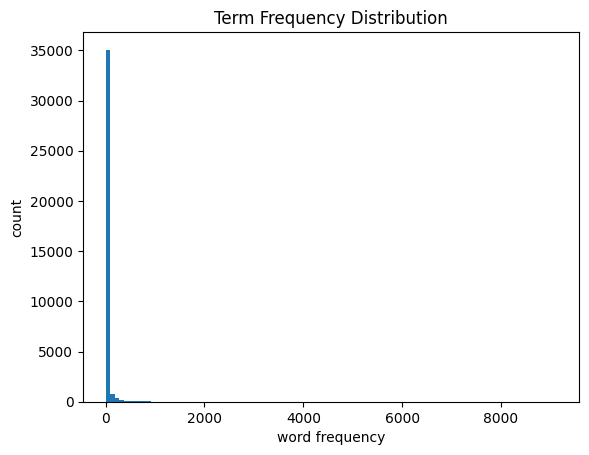

In [39]:
bow_df.sum().plot.hist(bins=100)
plt.xlabel('word frequency')
plt.ylabel('count')
plt.title('Term Frequency Distribution')

### Addressing Word Frequency Problem with sklearn Package

To address the problem I stated above, I utilized the TfidfVectorizer from the Python library sklearn. We initialized the vectorizer to accept preprocessed texts, which are strings of space-separated tokens, without the need for a custom tokenizer. 

The most important parameter here is the **"min_df"** parameter, and it was set to 4, serving as our threshold to exclude terms appearing in fewer than four documents. This strategy ensures that only terms with a significant presence across the dataset are considered, enhancing the relevancy and quality of the features used in further analysis. 

In [40]:
# Initialize the vectorizer without a custom tokenizer, assuming processed_texts are space-separated tokens in strings
tfidf_vectorizer = TfidfVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x.split(), token_pattern=None, lowercase=False, min_df=4)

# Fit it to the preprocessed and tokenized data
X = tfidf_vectorizer.fit_transform(processed_df["processed_content"])

# Output a dataframe
tfidf_df = pd.DataFrame(X.toarray())
tfidf_df.columns = tfidf_vectorizer.get_feature_names_out()
print(f'Dataframe Shape: {tfidf_df.shape}')
tfidf_df

Dataframe Shape: (2000, 12680)


,aaron,aaronkleinshow,abandon,abandonment,abbey,abbott,abc,abdel,abdicate,abduct,...,zero,zika,zionist,zip,zone,zoo,zoom,zuckerberg,’cause,’em
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.072013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Machine Learning for Classification

Now we finished all the preparation for the modeling, therefore we will use machine learning to classify Liberal and Conservative news outlets by looking at the TF-IDF of news articles.

First, we will split the data into training set and test set, with training set being 80% of the data, and test set being 20% of the data. This ensures that our machine learning model can be both trained and accurately evaluated. 

We further streamline the process by constructing a pipeline that integrates TfidfVectorizer for text vectorization and LogisticRegression as the classification algorithm. This combination is not only efficient but also effective in handling text data, transforming raw texts into a numerical format that the logistic regression model can interpret. After training the model on the training set, we utilize it to predict the political bias on the test set. 


In [41]:
# sklearn has a package to split the data into train and test groups
from sklearn.model_selection import train_test_split
seed = 42 # set your random see

# At this point, 'no_special_df_processed' contains both original and processed content, along with the original indices preserved
# You can perform train-test split using 'processed_content' as features and 'political_bias' as labels
X_train, X_test, y_train, y_test = train_test_split(processed_df['processed_content'], 
                                                    processed_df['political_bias'], 
                                                    test_size=0.2, random_state=42)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Define a Logistic Regression classifier
classifier = LogisticRegression()

# Setup the pipeline with TfidfVectorizer and LogisticRegression
pipe = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('classifier', classifier)
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Predict on the test data
predicted = pipe.predict(X_test)
# Evaluate the model
print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:", metrics.precision_score(y_test, predicted, average='weighted'))
print("Logistic Regression Recall:", metrics.recall_score(y_test, predicted, average='weighted'))


Logistic Regression Accuracy: 0.72
Logistic Regression Precision: 0.720408500413006
Logistic Regression Recall: 0.72


              precision    recall  f1-score   support

Conservative       0.71      0.74      0.72       199
     Liberal       0.73      0.70      0.72       201

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400



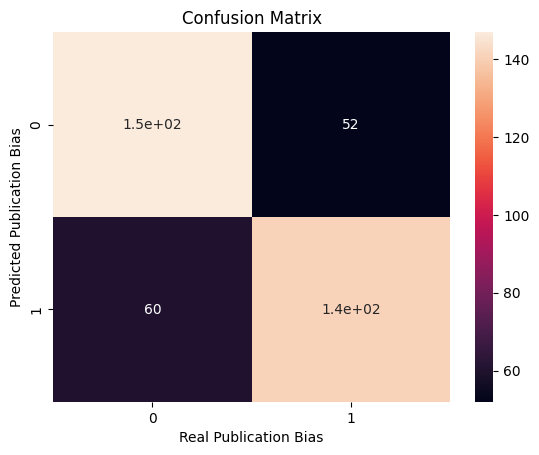

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check out a classification report
print(metrics.classification_report(y_test, predicted))

# We can also look at incorrect predictions in a confusion matrix heatmap
cm = metrics.confusion_matrix(y_test, predicted)
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Real Publication Bias')
plt.ylabel('Predicted Publication Bias')
plt.show()

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predicted)

# Assigning the confusion matrix values to respective variables
tn, fp, fn, tp = cm.ravel()

# Print the confusion matrix components
print(f"True Positive (TP): {tp}")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")

True Positive (TP): 141
True Negative (TN): 147
False Positive (FP): 52
False Negative (FN): 60


## Model Outcome

### <ins>Accuracy</ins>
The results from the Logistic Regression model reveal its performance in classifying texts into conservative and liberal political biases. The accuracy of **0.72** indicates that the model correctly predicts the political bias of approximately 72% of the articles in the test set. This means out of all predictions made, about 72% were correct irrespective of the class.

### <ins>Precision</ins>
Precision, which measures the model's exactness, stands at **0.720408500413006** on a weighted average. This implies that when the model predicts an article's bias as either conservative or liberal, it is correct about 72% of the time. Specifically, the model has a precision of 0.71 for conservative and 0.73 for liberal biases, suggesting it is slightly more precise in identifying liberal articles.

### <ins>Recall</ins>
Recall, or the model's completeness, is also **0.72** on a weighted average, indicating the model's ability to find all relevant instances in the test set. In other words, it successfully identifies 77.5% of all conservative or liberal articles. The recall rates for conservative (0.74) and liberal (0.70) biases show that the model is slightly better at recognizing conservative articles as such, compared to liberal ones.

### <ins>F1 Score</ins>
The f1-score, which combines precision and recall into a single metric, is **0.72** for both conservative and liberal biases on a macro average, and 0.72 on a weighted average. This suggests a balanced performance between precision and recall.

### <ins>Hypothesis</ins>
The performance metrics of the Logistic Regression model using TFIDF analysis, shows 72% of accuracy score, which strongly suggest that the initial hypothesis holds true. There are distinct lexical patterns present in news articles that align with the political bias of the news source. 

## Coefficients

This table represents the impact of specific words on the classification of articles as either conservative or liberal by a Logistic Regression model. The left side of the table, with columns labeled "coefficients_1" and "vocabulary_1," shows words that are strongly associated with conservative content. 
These words, when present in an article, make it less likely to be classified as liberal (class 2 in this context). Words like "cruz" and "percent" have negative coefficients, indicating their strong association with conservative viewpoints.

On the right side, the columns labeled "coefficients_2" and "vocabulary_2" display words that are positively associated with liberal content. These words, such as "mr." and "ms.," have positive coefficients, meaning their presence in an article increases the likelihood of it being classified as liberal. 

In [45]:
print(classifier.classes_)

['Conservative' 'Liberal']


In [44]:
coef_df = pd.DataFrame({'coefficients':list(classifier.coef_.flatten()), 'vocabulary': list(pd.DataFrame(tfidf_vectorizer.vocabulary_, index=[0]).T.sort_values(0).index)})

# take the lowest coefficients
lowest = coef_df.sort_values(by='coefficients').head(20).reset_index(drop=True) # the word that make the text less likely to classify as 1
lowest.columns = [col+'_1' for col in lowest.columns]

# take the highest coefficients
highest = coef_df.sort_values(by='coefficients').tail(20).sort_values(by='coefficients', ascending=False).reset_index(drop=True)
highest.columns = [col+'_2' for col in highest.columns] # the word that make the text more likely to classify as 2

# put them together to compare
pd.concat([lowest, highest], axis=1)

,coefficients_1,vocabulary_1,coefficients_2,vocabulary_2
0,-1.316182,cruz,4.133149,mr.
1,-1.174077,percent,1.844995,ms.
2,-1.117921,report,1.480747,like
3,-1.083050,cop,1.193452,people
4,-1.047913,twitter,1.076182,united
5,-1.015983,claim,1.071965,story
6,-0.978560,follow,1.063716,update
7,-0.906623,immigration,1.034198,partner
8,-0.900817,yankees,1.019156,episode
9,-0.891165,abortion,0.998240,white


# Conclusion

The conducted study aimed to answer whether Term Frequency-Inverse Document Frequency (TFIDF) analysis can distinguish between liberal and conservative news companies in the United States based on the content of their articles. The hypothesis was that TFIDF analysis would reveal distinct lexical patterns correlating with the political bias of the news source, where conservative and liberal outlets would employ different sets of frequently used terms and narratives.

### 1. Model Performance and Accuracy
The Logistic Regression model, trained on a dataset categorized by recognized political leanings, demonstrated an accuracy of 72%. This indicates that the model was capable of correctly identifying the political bias in approximately 72% of the cases within the test set. Such a level of accuracy, significantly above the baseline chance level (50%), validates the effectiveness of the model and the chosen methodology.

The precision of the model stands at approximately 72%, which is similar with its accuracy, indicating a reliable prediction capability when classifying an article's bias. Furthermore, the recall rate of 72% suggests a balanced detection rate across both conservative and liberal classes, with a slight edge in identifying conservative articles. This nuanced distinction is essential, as it showcases the model’s capacity to generalize across different political ideologies without disproportionate sensitivity to one category over another.

### 2. Coefficient
In terms of linguistic features, the model's coefficients provide a compelling narrative. Words such as "cruz," "percent," "cop," "twitter", "immigration", and "abortion" held significant weight in classifying articles as conservative, whereas terms like "mr.," "ms.," "update", "change", "young" and "united" were strong indicators of liberal content. These results mirror what we see in how different news sources choose their stories and topics. For instance, conservative news often highlights specific politicians and policies. On the other hand, liberal news tends to use formal titles and talk more about social change and progress, showing a different style of news reporting.

### 3. Hypothesis
The hypothesis that TFIDF analysis would reveal distinct lexical patterns correlating with the political bias of news sources is strongly supported by the model’s performance. This not only affirms the utility of machine learning and natural language processing in media bias detection but also provides a quantitative foundation for further analysis in the field.

### 4. Real World Interpretation
From a practical perspective, these results have substantial implications for the broader understanding of media influence on public opinion and political discourse. As media outlets continue to shape narratives, having a computational method to discern bias provides a critical tool for researchers, policymakers, and the general public. It enables a more informed consumption of news content and a nuanced understanding of the underlying biases that may be present.

Moreover, the study's findings contribute to the broader discussion on media bias, offering quantitative evidence of the linguistic distinctions that characterize conservative and liberal news sources. By highlighting specific words and phrases that are preferentially used by news outlets of different political orientations, this research provides a more nuanced understanding of how news content is shaped by underlying political biases.

## Moving forward and Limitation


### Future Study
As we advance, refining our methodology to enhance the model's accuracy and interpretability remains a priority. This involves experimenting with different preprocessing techniques, exploring more sophisticated models, and incorporating larger, more diverse datasets to capture a wider spectrum of political discourse. Additionally, integrating contextual understanding and sentiment analysis could offer deeper insights into the nuances of political bias. Engaging with interdisciplinary expertise from linguistics, political science, and data ethics will be crucial in developing more robust and fair models. Continuous evaluation against real-world data and feedback loops will help in fine-tuning the model's sensitivity to subtle biases, ensuring it remains relevant and accurate over time.

### Limitation
This study faces a few key challenges. First, our data doesn't explicitly label political bias, as I was using outside source to infer political bias, which made it tough for our model to nail down the subtle differences between political viewpoints. Also, deciding which news sources lean which way could itself influence the model's outcomes, since political bias isn't always black and white. Plus, cleaning up the data to remove special characters without losing important information turned out to be a delicate task. Moreover, since political stance and each party's emphasis on topics changes all the time, our model needs to keep learning and adjusting to stay accurate. Adding to these challenges, our dataset lacks information on the categories of the articles, whether they're about politics, economy, sports, or etc. This absence is crucial because the category of news can significantly influence its political bias. This gap in our data means our model might not fully grasp how different topics can reflect or shape political biases. 

# Resource

Nicholas Diakopoulos (2014): Algorithmic Accountability, Digital Journalism, DOI: 10.1080/21670811.2014.976411

"Media Bias Chart." AllSides, https://www.allsides.com/media-bias/media-bias-chart. Accessed [2024-04-01].

GPT-4 provided assistance in refining writing and offering coding support.